In [1]:
# scraping the pdf files to obtain the url

In [51]:
import requests
import pandas as pd
import urllib.request
import pdftotext
import promptlib #pip install prompt
import os
import glob
#conda install poppler : conda install -c conda-forge poppler
# conda install pdftotext : conda install -c conda-forge pdftotext
# conda install nltk : conda install -c anaconda nltk
from nltk import *
from nltk.corpus import *
import nltk
import sys
from sklearn.metrics.pairwise import cosine_similarity
#import the TfidfVectorizer from Scikit-Learn.
from sklearn.feature_extraction.text import TfidfVectorizer



In [54]:
#get download.csv by going on https://tel.archives-ouvertes.fr/search/advanced-export/uri/%3FomitHeader%3Dtrue%26wt%3Dphps%26q%3D%252A%26sort%3DsubmittedDate_tdate%2Bdesc%26fq%3DdocType_s%253A%2528THESE%2BOR%2BHDR%2529%26fq%3DsubmitType_s%253Afile%26fq%3DNOT%2Bstatus_i%253A111%26defType%3Dedismax%26rows%3D1000
#then export csv
df = pd.read_csv("H:/Downloads/Datatsets/Tel/tel_docs.csv")

In [55]:
df.head()

,halId_s,version_i,uri_s,docType_s,doiId_s,nntId_s,title_s,subTitle_s,authFullName_s,producedDate_s,...,journalTitle_s,journalPublisher_s,volume_s,number_s,page_s,conferenceTitle_s,conferenceStartDate_s,country_s,language_s,inPress_bool
0,tel-03440243,1,https://hal.univ-lorraine.fr/tel-03440243,THESE,NaN,2021LORR0152,L'impact des systèmes d'information hospitalie...,NaN,Sarah Garidi,2021-01-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fr,False
1,tel-03440181,1,https://tel.archives-ouvertes.fr/tel-03440181,THESE,NaN,2021UPASG065,Algorithmes multi-critères pour la prédiction ...,NaN,Louis Becquey,2021-10-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fr,False
2,tel-03440058,1,https://tel.archives-ouvertes.fr/tel-03440058,THESE,NaN,2021NORMR027,La microfinance et appui au microentrepreneuri...,NaN,Théogène Nsengiyumva,2021-09-24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fr,False
3,tel-03439538,1,https://pastel.archives-ouvertes.fr/tel-03439538,THESE,NaN,2020IAVF0016,Importance de la re-domestication pour la cons...,NaN,Cathy Bouffartigue,2020-12-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fr,False
4,tel-03439366,1,https://hal.archives-ouvertes.fr/tel-03439366,THESE,NaN,NaN,"Homomorphic Cryptography and Privacy,Cryptogra...",NaN,Chloé Hébant,2021-05-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,False


In [5]:
#convert urls to list
list_urls=df["uri_s"].values.tolist()

In [6]:
#convert ids to list
list_ids=df["halId_s"].values.tolist()

In [6]:
list_ids

['tel-03440243',
 'tel-03440181',
 'tel-03440058',
 'tel-03439538',
 'tel-03439366',
 'tel-03439358',
 'tel-03439354',
 'tel-03439346',
 'tel-03439261',
 'tel-03438938',
 'tel-03438925',
 'tel-03438923',
 'tel-03438921',
 'tel-03438863',
 'tel-03438829',
 'tel-03438828',
 'tel-03438811',
 'tel-03438755',
 'tel-03438105',
 'tel-03438104',
 'tel-03438103',
 'tel-03438102',
 'tel-03438101',
 'tel-03438100',
 'tel-03437616',
 'tel-03437573',
 'tel-03437572',
 'tel-01689242',
 'tel-03412908',
 'tel-03437282',
 'tel-03437096',
 'tel-03437063',
 'tel-03096870',
 'tel-03436551',
 'tel-03436548',
 'tel-03436545',
 'tel-03436542',
 'tel-03436530',
 'tel-03436527',
 'tel-03436501',
 'tel-03436409',
 'tel-03436405',
 'tel-03436394',
 'tel-03436372',
 'tel-03436368',
 'tel-03436364',
 'tel-03436335',
 'tel-03436173',
 'tel-03436157',
 'tel-03436137',
 'tel-03436087',
 'tel-03436025',
 'tel-03436024',
 'tel-03436023',
 'tel-03436011',
 'tel-03435936',
 'tel-03435885',
 'tel-03435884',
 'tel-03435883

## list_urls

In [8]:
#we need 50 urls, so we just subset the first 50

In [9]:
urllib.request.urlretrieve("https://tel.archives-ouvertes.fr/tel-03436157/document", "test1.pdf")

KeyboardInterrupt: 

In [10]:
#subset 50 ids from list
list_ids = list_ids[:50]

In [60]:
count=0
#first 50 urls
for i in list_urls[:50]:
    
    url = i +"/document"
    #download pdfs
    urllib.request.urlretrieve(url, "{}.pdf".format(list_ids[count]))
    print(count,end="\r")
    count +=1

IndexError: list index out of range

## Convert pdf to text files

In [7]:
extension = "pdf"
#Prompt directory in which all files were downloaded, 
prompter = promptlib.Files()
#Set working directory to chosen directory
dir = prompter.dir()
os.chdir(dir)
#Get list of all pdf files in directory
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

KeyboardInterrupt: 

In [34]:
#downloaded excess files so subset 50 out of the list
all_filenames=all_filenames[5:55]

In [35]:
len(all_filenames)

50

In [41]:
for file in all_filenames:
    with open(file, "rb") as f:
        pdf = pdftotext.PDF(f)
    # Save all text to a txt file.
    split_string = file.split(".", 1)
    substring = split_string[0]
    with open('{}'.format(substring+".txt"), 'w',encoding="utf-8") as f:
        f.write("\n\n".join(pdf))

## LANGUAGE DETECTION

In [43]:
# def language_ratio(input):
#     lang_ratio={}
#     tokens=wordpunct_tokenize(input)
#     words=[word.lower()for word in tokens]
#     for language in stopwords.fileids():
#         stopwords_set=set(stopwords.words(language))
#         words_set=set(words)
#         common_elements=words_set.intersection(stopwords_set)
#         lang_ratio[language]=len(common_elements)
#     return lang_ratio

In [74]:
# def detect_lang(input):
#     ratios=language_ratio(input)
#     language=max(ratios,key=ratios.get)
#     return language

In [46]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [47]:
stopwords.fileids()


['arabic',
 'azerbaijani',
 'bengali',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [61]:
# reference  : https://blog.alejandronolla.com/2013/05/15/detecting-text-language-with-python-and-nltk/

try:
    from nltk import wordpunct_tokenize
    from nltk.corpus import stopwords
except ImportError:
    print ('[!] You need to install nltk (http://nltk.org/index.html)')



#----------------------------------------------------------------------
def _calculate_languages_ratios(text):
    """
    Calculate probability of given text to be written in several languages and
    return a dictionary that looks like {'french': 2, 'spanish': 4, 'english': 0}
    
    @param text: Text whose language want to be detected
    @type text: str
    
    @return: Dictionary with languages and unique stopwords seen in analyzed text
    @rtype: dict
    """

    languages_ratios = {}

    '''
    nltk.wordpunct_tokenize() splits all punctuations into separate tokens
    
    >>> wordpunct_tokenize("That's thirty minutes away. I'll be there in ten.")
    ['That', "'", 's', 'thirty', 'minutes', 'away', '.', 'I', "'", 'll', 'be', 'there', 'in', 'ten', '.']
    '''

    tokens = wordpunct_tokenize(text)
    words = [word.lower() for word in tokens]

    # Compute per language included in nltk number of unique stopwords appearing in analyzed text
    for language in stopwords.fileids():
        stopwords_set = set(stopwords.words(language))
        words_set = set(words)
        common_elements = words_set.intersection(stopwords_set)

        languages_ratios[language] = len(common_elements) # language "score"

    return languages_ratios


#----------------------------------------------------------------------
def detect_language(text):
    """
    Calculate probability of given text to be written in several languages and
    return the highest scored.
    
    It uses a stopwords based approach, counting how many unique stopwords
    are seen in analyzed text.
    
    @param text: Text whose language want to be detected
    @type text: str
    
    @return: Most scored language guessed
    @rtype: str
    """

    ratios = _calculate_languages_ratios(text)

    most_rated_language = max(ratios, key=ratios.get)

    return most_rated_language





In [63]:
# Apply to our text files 

In [2]:
extension = "txt"
#Prompt directory in which all files were downloaded, 
prompter = promptlib.Files()
#Set working directory to chosen directory
dir = prompter.dir()
os.chdir(dir)
#Get list of all pdf files
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [3]:
all_filenames

['tel-03435883.txt',
 'tel-03435884.txt',
 'tel-03435885.txt',
 'tel-03435936.txt',
 'tel-03436011.txt',
 'tel-03436023.txt',
 'tel-03436024.txt',
 'tel-03436025.txt',
 'tel-03436087.txt',
 'tel-03436137.txt',
 'tel-03436157.txt',
 'tel-03436173.txt',
 'tel-03436335.txt',
 'tel-03436364.txt',
 'tel-03436368.txt',
 'tel-03436372.txt',
 'tel-03436394.txt',
 'tel-03436405.txt',
 'tel-03436409.txt',
 'tel-03436501.txt',
 'tel-03436527.txt',
 'tel-03436530.txt',
 'tel-03436542.txt',
 'tel-03436545.txt',
 'tel-03436548.txt',
 'tel-03436551.txt',
 'tel-03437063.txt',
 'tel-03437096.txt',
 'tel-03437282.txt',
 'tel-03437572.txt',
 'tel-03437573.txt',
 'tel-03437616.txt',
 'tel-03438100.txt',
 'tel-03438101.txt',
 'tel-03438102.txt',
 'tel-03438103.txt',
 'tel-03438104.txt',
 'tel-03438105.txt',
 'tel-03438755.txt',
 'tel-03438811.txt',
 'tel-03438828.txt',
 'tel-03438829.txt',
 'tel-03438863.txt',
 'tel-03438921.txt',
 'tel-03438923.txt',
 'tel-03438925.txt',
 'tel-03438938.txt',
 'tel-0343926

In [21]:
f = open('tel-03439354.txt', 'r',encoding="utf-8")


In [69]:
text = f.read()


In [70]:
language = detect_language(text)


In [73]:
for file in all_filenames:
    with open(file, "r",encoding="utf-8") as f:
        #read file as text and store in variable `text`
        text = f.read()
        split_string = file.split(".", 1)
        substring = split_string[0]
        language = detect_language(text)
        print("Thesis ID :{}".format(substring) +" Language : {}".format(language))
   

Thesis ID :tel-03435883 Language : english
Thesis ID :tel-03435884 Language : english
Thesis ID :tel-03435885 Language : english
Thesis ID :tel-03435936 Language : english
Thesis ID :tel-03436011 Language : french
Thesis ID :tel-03436023 Language : english
Thesis ID :tel-03436024 Language : english
Thesis ID :tel-03436025 Language : french
Thesis ID :tel-03436087 Language : english
Thesis ID :tel-03436137 Language : english
Thesis ID :tel-03436157 Language : english
Thesis ID :tel-03436173 Language : english
Thesis ID :tel-03436335 Language : french
Thesis ID :tel-03436364 Language : french
Thesis ID :tel-03436368 Language : french
Thesis ID :tel-03436372 Language : french
Thesis ID :tel-03436394 Language : romanian
Thesis ID :tel-03436405 Language : french
Thesis ID :tel-03436409 Language : english
Thesis ID :tel-03436501 Language : english
Thesis ID :tel-03436527 Language : english
Thesis ID :tel-03436530 Language : english
Thesis ID :tel-03436542 Language : french
Thesis ID :tel-034

## Process the data and use TF-IDF and cosine to assess similarity between the documents

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
pd.set_option("max_rows", 600)
from pathlib import Path  
import glob

In [7]:
directory_path = "H:\Downloads\Datatsets\Tel\Tel_text"
text_files = glob.glob(f"{directory_path}/*.txt")


In [8]:
text_files

['H:\\Downloads\\Datatsets\\Tel\\Tel_text\\tel-03435883.txt',
 'H:\\Downloads\\Datatsets\\Tel\\Tel_text\\tel-03435884.txt',
 'H:\\Downloads\\Datatsets\\Tel\\Tel_text\\tel-03435885.txt',
 'H:\\Downloads\\Datatsets\\Tel\\Tel_text\\tel-03435936.txt',
 'H:\\Downloads\\Datatsets\\Tel\\Tel_text\\tel-03436011.txt',
 'H:\\Downloads\\Datatsets\\Tel\\Tel_text\\tel-03436023.txt',
 'H:\\Downloads\\Datatsets\\Tel\\Tel_text\\tel-03436024.txt',
 'H:\\Downloads\\Datatsets\\Tel\\Tel_text\\tel-03436025.txt',
 'H:\\Downloads\\Datatsets\\Tel\\Tel_text\\tel-03436087.txt',
 'H:\\Downloads\\Datatsets\\Tel\\Tel_text\\tel-03436137.txt',
 'H:\\Downloads\\Datatsets\\Tel\\Tel_text\\tel-03436157.txt',
 'H:\\Downloads\\Datatsets\\Tel\\Tel_text\\tel-03436173.txt',
 'H:\\Downloads\\Datatsets\\Tel\\Tel_text\\tel-03436335.txt',
 'H:\\Downloads\\Datatsets\\Tel\\Tel_text\\tel-03436364.txt',
 'H:\\Downloads\\Datatsets\\Tel\\Tel_text\\tel-03436368.txt',
 'H:\\Downloads\\Datatsets\\Tel\\Tel_text\\tel-03436372.txt',
 'H:\\Do

In [9]:
text_titles = [Path(text).stem for text in text_files]


In [60]:
# https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/03-TF-IDF-Scikit-Learn.html

In [10]:
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from spacy.lang.en.stop_words import STOP_WORDS as en_stop
from spacy.lang.ro.stop_words import STOP_WORDS as ro_stop
from spacy.lang.pt.stop_words import STOP_WORDS as pt_stop


final_stopwords_list = list(fr_stop) + list(en_stop) + list(ro_stop) +list(pt_stop)

In [11]:
tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words=final_stopwords_list)


In [12]:
tfidf_vector = tfidf_vectorizer.fit_transform(text_files)


C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 'neuf', 'printr', 'qu', 'quelqu', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [13]:
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names())


In [45]:
tfidf_df.loc['00_Document Frequency'] = (tfidf_df > 0).sum()


In [46]:
tfidf_df = tfidf_df.drop('00_Document Frequency', errors='ignore')


In [47]:
tfidf_df.stack().reset_index()


,level_0,level_1,0
0,tel-03334270,00,0.000903
1,tel-03334270,000,0.000000
2,tel-03334270,0000,0.000000
3,tel-03334270,00000,0.000000
4,tel-03334270,0000000000,0.000000
...,...,...,...
6380725,tel-03442970,𝜖𝑒𝑚𝑝,0.000000
6380726,tel-03442970,𝜖𝑡,0.000000
6380727,tel-03442970,𝜖𝑣𝑜𝑙,0.000000
6380728,tel-03442970,𝜙𝜋𝜑²,0.000000


In [48]:
tfidf_df = tfidf_df.stack().reset_index()


In [49]:
tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document','level_1': 'term', 'level_2': 'term'})


In [56]:
tfidf_df=tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(5)


In [57]:
import altair as alt
import numpy as np
term_list=[]

# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = tfidf_df.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(tfidf_df.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# red circle over terms in above list
circle = base.mark_circle(size=100).encode(
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')        
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + circle + text).properties(width = 600)

alt.LayerChart(...)

# N-GRAM 

In [21]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[a-zA-Z'`éèî]+")

In [22]:
from nltk.util import ngrams
generated_ngrams = ngrams('TEXT', 4, pad_left=True, pad_right=True, pad_symbol=' ')
generated_ngrams[4]

TypeError: ngrams() got an unexpected keyword argument 'pad_symbol'

In [23]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)

In [24]:
def generate_N_grams(text,ngram=1):
    words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
    print("Sentence after removing stopwords:",words)
    temp=zip(*[words[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans

In [ ]:
nltk.download()

In [28]:
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from spacy.lang.en.stop_words import STOP_WORDS as en_stop
from spacy.lang.ro.stop_words import STOP_WORDS as ro_stop
from spacy.lang.pt.stop_words import STOP_WORDS as pt_stop


final_stopwords_list = list(fr_stop) + list(en_stop) + list(ro_stop) +list(pt_stop)

tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words=final_stopwords_list, ngram_range=(2,2))





tfidf_vector = tfidf_vectorizer.fit_transform(text_files)


In [29]:
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names())


tfidf_df.loc['00_Document Frequency'] = (tfidf_df > 0).sum()


tfidf_df = tfidf_df.drop('00_Document Frequency', errors='ignore')


tfidf_df.stack().reset_index()


tfidf_df = tfidf_df.stack().reset_index()


tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document','level_1': 'term', 'level_2': 'term'})




,document,term,tfidf
195306,tel-03334270,algebraic error,0.387046
1443385,tel-03334270,ρij alg,0.174078
1441834,tel-03334270,λij ρij,0.172226
1223975,tel-03334270,smoothing steps,0.168523
1345964,tel-03334270,uj uij,0.164819
176106,tel-03334270,adaptive smoothing,0.161115
1384867,tel-03334270,vj vj,0.158681
1026930,tel-03334270,posteriori estimator,0.137040
610602,tel-03334270,finite element,0.136836
1026620,tel-03334270,post smoothing,0.129633


In [36]:
test_df = (tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)).tail(10)


In [37]:
test_df

,document,term,tfidf
64649175,tel-03442970,nirb rectification,0.277342
64636045,tel-03442970,méthode nirb,0.245287
64000941,tel-03442970,base réduite,0.232744
64290760,tel-03442970,erreur nirb,0.211839
64503233,tel-03442970,jeux paramètres,0.188555
64484909,tel-03442970,intermédiaire date,0.181178
65110545,tel-03442970,version intermédiaire,0.181178
64179218,tel-03442970,date 29,0.163414
64794137,tel-03442970,proje tion,0.154698
63837295,tel-03442970,29 octobre,0.150811


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

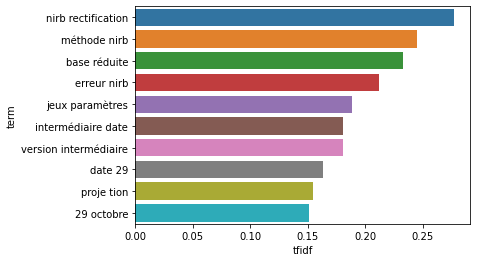

In [38]:
# Construct plot
sns.barplot(x = "tfidf", y = "term", data = test_df)
plt.show()

In [40]:
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from spacy.lang.en.stop_words import STOP_WORDS as en_stop
from spacy.lang.ro.stop_words import STOP_WORDS as ro_stop
from spacy.lang.pt.stop_words import STOP_WORDS as pt_stop


final_stopwords_list = list(fr_stop) + list(en_stop) + list(ro_stop) +list(pt_stop)

tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words=final_stopwords_list, ngram_range=(3,3))





tfidf_vector = tfidf_vectorizer.fit_transform(text_files)


tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names())


tfidf_df.loc['00_Document Frequency'] = (tfidf_df > 0).sum()


tfidf_df = tfidf_df.drop('00_Document Frequency', errors='ignore')


tfidf_df.stack().reset_index()


tfidf_df = tfidf_df.stack().reset_index()


tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document','level_1': 'term', 'level_2': 'term'})


tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(5)


C:\Users\eyabe\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,document,term,tfidf
1790772,tel-03334270,url https org,0.212089
1224989,tel-03334270,number smoothing steps,0.137197
734179,tel-03334270,estimator algebraic error,0.124131
1357167,tel-03334270,posteriori estimator algebraic,0.120864
1356777,tel-03334270,post smoothing steps,0.111064
2175053,tel-03438101,alcohol clin exp,0.275429
2381152,tel-03438101,clin exp res,0.275429
2175150,tel-03438101,alcohol use disorder,0.126697
3302968,tel-03438101,prise charge addictologique,0.088137
2175099,tel-03438101,alcohol dependent patients,0.082629


In [28]:
#https://studymachinelearning.com/cosine-similarity-text-similarity-metric/

In [14]:
# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(text_files)

# Compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)
print(cosine_sim)


[[1.         0.29042856 0.29042856 ... 0.29042856 0.29042856 0.29042856]
 [0.29042856 1.         0.29042856 ... 0.29042856 0.29042856 0.29042856]
 [0.29042856 0.29042856 1.         ... 0.29042856 0.29042856 0.29042856]
 ...
 [0.29042856 0.29042856 0.29042856 ... 1.         0.29042856 0.29042856]
 [0.29042856 0.29042856 0.29042856 ... 0.29042856 1.         0.29042856]
 [0.29042856 0.29042856 0.29042856 ... 0.29042856 0.29042856 1.        ]]


In [27]:
# Import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
# Generate cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.29042856 0.29042856 ... 0.29042856 0.29042856 0.29042856]
 [0.29042856 1.         0.29042856 ... 0.29042856 0.29042856 0.29042856]
 [0.29042856 0.29042856 1.         ... 0.29042856 0.29042856 0.29042856]
 ...
 [0.29042856 0.29042856 0.29042856 ... 1.         0.29042856 0.29042856]
 [0.29042856 0.29042856 0.29042856 ... 0.29042856 1.         0.29042856]
 [0.29042856 0.29042856 0.29042856 ... 0.29042856 0.29042856 1.        ]]


In [17]:
get_recommendations("tel-03442970",cosine_sim,indices)

NameError: name 'get_recommendations' is not defined

In [18]:
print(get_recommendations("tel-03442970", cosine_sim, indices))

NameError: name 'get_recommendations' is not defined

In [20]:
bow = pd.DataFrame(cosine_sim)

In [22]:
bow

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.000000,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,...,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429
1,0.290429,1.000000,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,...,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429
2,0.290429,0.290429,1.000000,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,...,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429
3,0.290429,0.290429,0.290429,1.000000,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,...,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429
4,0.290429,0.290429,0.290429,0.290429,1.000000,0.290429,0.290429,0.290429,0.290429,0.290429,...,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429
5,0.290429,0.290429,0.290429,0.290429,0.290429,1.000000,0.290429,0.290429,0.290429,0.290429,...,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429
6,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,1.000000,0.290429,0.290429,0.290429,...,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429
7,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,1.000000,0.290429,0.290429,...,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429
8,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,1.000000,0.290429,...,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429
9,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,1.000000,...,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429,0.290429


<AxesSubplot:>

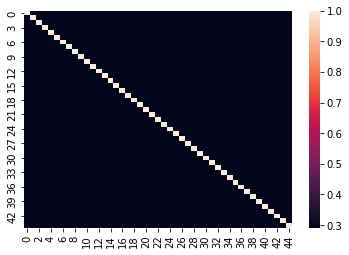

In [26]:
sns.heatmap(bow)


In [14]:
# check similarity between documents

In [19]:
docs_names=all_filenames[:10]

In [20]:
data=[]
for doc in docs_names:
    with open(doc, "r",encoding="utf-8") as f:
        #read file as text and store in variable `text`
        text = f.read()
        data.append(text)
        

In [32]:
doc_names=[]
for doc in docs_names:
    
    split_string = doc.split(".", 1)
    substring = split_string[0]
    doc_names.append(substring)

In [33]:
doc_names

['tel-03435883',
 'tel-03435884',
 'tel-03435885',
 'tel-03435936',
 'tel-03436011',
 'tel-03436023',
 'tel-03436024',
 'tel-03436025',
 'tel-03436087',
 'tel-03436137']

In [39]:
df_docnames = pd.DataFrame(doc_names)

In [82]:
df_docnames

,halId_s
0,tel-03435883
1,tel-03435884
2,tel-03435885
3,tel-03435936
4,tel-03436011
5,tel-03436023
6,tel-03436024
7,tel-03436025
8,tel-03436087
9,tel-03436137


In [44]:
df_docnames=df_docnames.rename(columns={0:"halId_s"})

In [57]:
df_merged=pd.merge(df_docnames,df,on="halId_s")

In [59]:
doc_names=df_merged["title_s"].tolist()

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
vector_matrix = count_vectorizer.fit_transform(data)
vector_matrix

<10x53455 sparse matrix of type '<class 'numpy.int64'>'
	with 93787 stored elements in Compressed Sparse Row format>

In [23]:
tokens = count_vectorizer.get_feature_names()


In [24]:
vector_matrix.toarray()


array([[ 1,  7,  0, ...,  0,  0,  0],
       [60,  5,  0, ...,  0,  0,  0],
       [ 0, 11,  0, ...,  0,  0,  0],
       ...,
       [43,  1,  0, ...,  0,  0,  0],
       [37, 42,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [60]:
def create_dataframe(matrix, tokens):

    #doc_names = [f'doc_{i+1}' for i, _ in enumerate(matrix)]
    df = pd.DataFrame(data=matrix, index=doc_names, columns=tokens)
    return(df)

In [61]:
create_dataframe(vector_matrix.toarray(),tokens)


,00,000,0000,0000034996,00000407,0000042954,00000457,00000569,00001,00001143,...,𝜎𝑁550,𝜎𝑆𝑁,𝜎𝑇,𝜎𝑇𝑟𝑒𝑓𝑙,𝜎𝑎𝑏𝑠,𝜎𝑒𝑥𝑡,𝜎𝑟𝑒𝑎𝑑,𝜎𝑠𝑐𝑎𝑡,𝜎𝛥𝑇,𝜭abs
"Les systèmes Toxine-Antitoxine VapBC : des régulateurs de la symbiose fixatrice d'azote Rhizobium-Légumineuse,The VapBC Toxin-Antitoxin systems : regulators of the nitrogen-fixing symbiosis Rhizobium-Legume",1,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Étude phylogénique de souches d'alphaherpèsvirus isolées chez les équidés français et développement d'un outil innovant pour la mesure des anticorps neutralisants après infection ou vaccination,Phylogenic study of equid alphaherpesvirus strains isolated in France and development of an innovative assay for the measurement of neutralising antibodies after infection or vaccination",60,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Multi-scale studies of Measeles virus nucleocapsid assembly,Etudes multi-échelles de l'assemblage de la nucléocapside du virus de la rougeole",0,11,0,0,0,1,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
"Caractérisation génomique des anomalies de la pigmentation cutanée en mosaïque,Genomic characterization of mosaic cutaneous pigmentary disorders",8,48,1,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
"Le Conseil économique\, social et environnemental régional : assemblée du dialogue des intérêts organisés dans la région,The Conseil économique\, social et environnemental régional : an assembly of dialogue between organised interests in the Région",1,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Optical Developments for Microscale Measurement and Control of Temperature in Optogenetics,Développements optiques pour la mesure et le contrôle micrométrique de la température en optogénétique",0,0,0,0,0,0,0,0,0,0,...,2,5,3,1,7,1,3,3,1,0
"Z-boson and double charm production with ALICE at the LHC,Production des bosons Z et du double charme avec ALICE auprès du LHC",24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"Caractérisation opto-mécanique du verre traité par des méthodes thermo-chimiques,Opto-mechanical characterization of glass treated by thermochemical methods",43,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"La Dynamique sociale des pratiques : stratification sociale\, changement social et consommation alimentaire,The Social Dynamics of Practices : social stratification\, social change and food consumption",37,42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Random surface growth models : hydrodynamic limits and fluctuations,Modèles de croissance de surfaces aléatoires : limites hydrodynamiques et fluctuations",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity_matrix = cosine_similarity(vector_matrix)

In [64]:
distance_matrix=create_dataframe(cosine_similarity_matrix,doc_names)


In [80]:
distance_matrix

,"Les systèmes Toxine-Antitoxine VapBC : des régulateurs de la symbiose fixatrice d'azote Rhizobium-Légumineuse,The VapBC Toxin-Antitoxin systems : regulators of the nitrogen-fixing symbiosis Rhizobium-Legume","Étude phylogénique de souches d'alphaherpèsvirus isolées chez les équidés français et développement d'un outil innovant pour la mesure des anticorps neutralisants après infection ou vaccination,Phylogenic study of equid alphaherpesvirus strains isolated in France and development of an innovative assay for the measurement of neutralising antibodies after infection or vaccination","Multi-scale studies of Measeles virus nucleocapsid assembly,Etudes multi-échelles de l'assemblage de la nucléocapside du virus de la rougeole","Caractérisation génomique des anomalies de la pigmentation cutanée en mosaïque,Genomic characterization of mosaic cutaneous pigmentary disorders","Le Conseil économique\, social et environnemental régional : assemblée du dialogue des intérêts organisés dans la région,The Conseil économique\, social et environnemental régional : an assembly of dialogue between organised interests in the Région","Optical Developments for Microscale Measurement and Control of Temperature in Optogenetics,Développements optiques pour la mesure et le contrôle micrométrique de la température en optogénétique","Z-boson and double charm production with ALICE at the LHC,Production des bosons Z et du double charme avec ALICE auprès du LHC","Caractérisation opto-mécanique du verre traité par des méthodes thermo-chimiques,Opto-mechanical characterization of glass treated by thermochemical methods","La Dynamique sociale des pratiques : stratification sociale\, changement social et consommation alimentaire,The Social Dynamics of Practices : social stratification\, social change and food consumption","Random surface growth models : hydrodynamic limits and fluctuations,Modèles de croissance de surfaces aléatoires : limites hydrodynamiques et fluctuations"
"Les systèmes Toxine-Antitoxine VapBC : des régulateurs de la symbiose fixatrice d'azote Rhizobium-Légumineuse,The VapBC Toxin-Antitoxin systems : regulators of the nitrogen-fixing symbiosis Rhizobium-Legume",1.000000,0.869968,0.436238,0.845360,0.826060,0.390573,0.408820,0.856415,0.858910,0.425379
"Étude phylogénique de souches d'alphaherpèsvirus isolées chez les équidés français et développement d'un outil innovant pour la mesure des anticorps neutralisants après infection ou vaccination,Phylogenic study of equid alphaherpesvirus strains isolated in France and development of an innovative assay for the measurement of neutralising antibodies after infection or vaccination",0.869968,1.000000,0.520814,0.839129,0.714074,0.459029,0.473688,0.745178,0.765129,0.487731
"Multi-scale studies of Measeles virus nucleocapsid assembly,Etudes multi-échelles de l'assemblage de la nucléocapside du virus de la rougeole",0.436238,0.520814,1.000000,0.624248,0.054021,0.902244,0.893786,0.137838,0.164582,0.896544
"Caractérisation génomique des anomalies de la pigmentation cutanée en mosaïque,Genomic characterization of mosaic cutaneous pigmentary disorders",0.845360,0.839129,0.624248,1.000000,0.667855,0.562920,0.564764,0.708963,0.715957,0.595607
"Le Conseil économique\, social et environnemental régional : assemblée du dialogue des intérêts organisés dans la région,The Conseil économique\, social et environnemental régional : an assembly of dialogue between organised interests in the Région",0.826060,0.714074,0.054021,0.667855,1.000000,0.054753,0.084653,0.909965,0.935777,0.099149
"Optical Developments for Microscale Measurement and Control of Temperature in Optogenetics,Développements optiques pour la mesure et le contrôle micrométrique de la température en optogénétique",0.390573,0.459029,0.902244,0.562920,0.054753,1.000000,0.930772,0.131181,0.146390,0.910944
"Z-boson and double charm production with ALICE at the LHC,Production des bosons Z et du double charme avec ALICE auprès du LHC",0.408820,0.473688,0.8

In [81]:
distance_matrix.to_csv(r'H:\Downloads\Datatsets\Tel\dist_m.csv',index=True)


In [67]:
df_test=pd.read_csv("http://datasets.flowingdata.com/ppg2008.csv")

In [71]:
df_test.iloc[1:20, -1]

1     1.7
2     2.3
3     2.2
4     3.1
5     1.8
6     2.3
7     2.8
8     2.7
9     3.0
10    2.5
11    1.6
12    2.7
13    1.5
14    3.1
15    2.2
16    2.4
17    1.4
18    2.7
19    2.7
Name: PF, dtype: float64

In [72]:
distance_matrix.iloc[1:10,-1]

Étude phylogénique de souches d'alphaherpèsvirus isolées chez les équidés français et développement d'un outil innovant pour la mesure des anticorps neutralisants après infection ou vaccination,Phylogenic study of equid alphaherpesvirus strains isolated in France and development of an innovative assay for the measurement of neutralising antibodies after infection or vaccination    0.487731
Multi-scale studies of Measeles virus nucleocapsid assembly,Etudes multi-échelles de l'assemblage de la nucléocapside du virus de la rougeole                                                                                                                                                                                                                                                   0.896544
Caractérisation génomique des anomalies de la pigmentation cutanée en mosaïque,Genomic characterization of mosaic cutaneous pigmentary disorders                                                                      

In [83]:
distance_matrix.reset_index().to_csv(r'H:\Downloads\Datatsets\Tel\dist_m.csv',index=True,encoding="utf-8")

In [77]:
distance_matrix

,"Les systèmes Toxine-Antitoxine VapBC : des régulateurs de la symbiose fixatrice d'azote Rhizobium-Légumineuse,The VapBC Toxin-Antitoxin systems : regulators of the nitrogen-fixing symbiosis Rhizobium-Legume","Étude phylogénique de souches d'alphaherpèsvirus isolées chez les équidés français et développement d'un outil innovant pour la mesure des anticorps neutralisants après infection ou vaccination,Phylogenic study of equid alphaherpesvirus strains isolated in France and development of an innovative assay for the measurement of neutralising antibodies after infection or vaccination","Multi-scale studies of Measeles virus nucleocapsid assembly,Etudes multi-échelles de l'assemblage de la nucléocapside du virus de la rougeole","Caractérisation génomique des anomalies de la pigmentation cutanée en mosaïque,Genomic characterization of mosaic cutaneous pigmentary disorders","Le Conseil économique\, social et environnemental régional : assemblée du dialogue des intérêts organisés dans la région,The Conseil économique\, social et environnemental régional : an assembly of dialogue between organised interests in the Région","Optical Developments for Microscale Measurement and Control of Temperature in Optogenetics,Développements optiques pour la mesure et le contrôle micrométrique de la température en optogénétique","Z-boson and double charm production with ALICE at the LHC,Production des bosons Z et du double charme avec ALICE auprès du LHC","Caractérisation opto-mécanique du verre traité par des méthodes thermo-chimiques,Opto-mechanical characterization of glass treated by thermochemical methods","La Dynamique sociale des pratiques : stratification sociale\, changement social et consommation alimentaire,The Social Dynamics of Practices : social stratification\, social change and food consumption","Random surface growth models : hydrodynamic limits and fluctuations,Modèles de croissance de surfaces aléatoires : limites hydrodynamiques et fluctuations"
"Les systèmes Toxine-Antitoxine VapBC : des régulateurs de la symbiose fixatrice d'azote Rhizobium-Légumineuse,The VapBC Toxin-Antitoxin systems : regulators of the nitrogen-fixing symbiosis Rhizobium-Legume",1.000000,0.869968,0.436238,0.845360,0.826060,0.390573,0.408820,0.856415,0.858910,0.425379
"Étude phylogénique de souches d'alphaherpèsvirus isolées chez les équidés français et développement d'un outil innovant pour la mesure des anticorps neutralisants après infection ou vaccination,Phylogenic study of equid alphaherpesvirus strains isolated in France and development of an innovative assay for the measurement of neutralising antibodies after infection or vaccination",0.869968,1.000000,0.520814,0.839129,0.714074,0.459029,0.473688,0.745178,0.765129,0.487731
"Multi-scale studies of Measeles virus nucleocapsid assembly,Etudes multi-échelles de l'assemblage de la nucléocapside du virus de la rougeole",0.436238,0.520814,1.000000,0.624248,0.054021,0.902244,0.893786,0.137838,0.164582,0.896544
"Caractérisation génomique des anomalies de la pigmentation cutanée en mosaïque,Genomic characterization of mosaic cutaneous pigmentary disorders",0.845360,0.839129,0.624248,1.000000,0.667855,0.562920,0.564764,0.708963,0.715957,0.595607
"Le Conseil économique\, social et environnemental régional : assemblée du dialogue des intérêts organisés dans la région,The Conseil économique\, social et environnemental régional : an assembly of dialogue between organised interests in the Région",0.826060,0.714074,0.054021,0.667855,1.000000,0.054753,0.084653,0.909965,0.935777,0.099149
"Optical Developments for Microscale Measurement and Control of Temperature in Optogenetics,Développements optiques pour la mesure et le contrôle micrométrique de la température en optogénétique",0.390573,0.459029,0.902244,0.562920,0.054753,1.000000,0.930772,0.131181,0.146390,0.910944
"Z-boson and double charm production with ALICE at the LHC,Production des bosons Z et du double charme avec ALICE auprès du LHC",0.408820,0.473688,0.8